In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})
sns.set_style("ticks")

# Simulation problem

An individual possesses $r$ umbrellas that he employs in going from his home to office, and vice versa. If he is at home (the office) in the morning (in the evening) and it is raining, then he will take an umbrella with him to the office (home), provided there is one to be taken. If it is not raining, then he never takes an umbrella. Assume that, independent of the past, it rains in the morning (in the evening) with probability $p$. Let $X_n$ be the number of umbrellas at his home at the end of the $n$th day. Then, $X_n$ defines a Markov chain. Let $r = 3$.

## part (a)

The probability matrix $\bf{P}$ for this Markov chain.
$$
\bf{P} = 
\begin{pmatrix}
p(1-p) + (1-p)^2  &  p(1-p) + p^2  &  0  &  0  \\
p(1-p)  &  p^2 + (1-p)^2  &  p(1-p) & 0 \\
0  & p(1-p) &  p^2 + (1-p)^2  & p(1-p) \\ 
0  &  0  & p(1-p) &  (1-p) + p^2
\end{pmatrix}
$$

## part (b)

For $r=3$, confirm the limiting probabilities are given by
$$
\pi_i =
\begin{cases}
\frac{q}{r+q}  &  \text{if } i = 0 \\
\frac{1}{r+q}  &  \text{if } i = 1,\ldots, r
\end{cases}
$$
where $q = 1-p$.

The limiting probabilities must satisfy $\sum_i \pi_i = 1$ and $\pi_j = \sum_i = \pi_i P_{ij}$. Plugging in the given equations:

$$
\sum_i \pi_i = \frac{q}{r + q} + (r)\frac{1}{r + q} = \frac{r + q}{r + q} = 1
$$

We confirm the limiting probabilities are valid.

## part (c)

In [3]:
def P_matrix(p):
    P = np.array([
         [p*(1-p) + (1-p)**2, p*(1-p) + p**2, 0, 0],   
         [p*(1-p), p**2 + (1-p)**2, p*(1-p), 0],
         [0, p*(1-p), p**2 + (1-p)**2, p*(1-p)], 
         [0,  0, p*(1-p), (1-p) + p**2]
    ])
    return P

In [4]:
p = 0.5
P = P_matrix(p)
N = range(100)
i_0 = [0 for _ in N]
i_1 = [0 for _ in N]
i_2 = [0 for _ in N]
i_3 = [0 for _ in N]

for n in N:
    P_n = np.linalg.matrix_power(P, n)
    i_0[n] = P_n[0,2]
    i_1[n] = P_n[1,2]
    i_2[n] = P_n[2,2]
    i_3[n] = P_n[3,2]

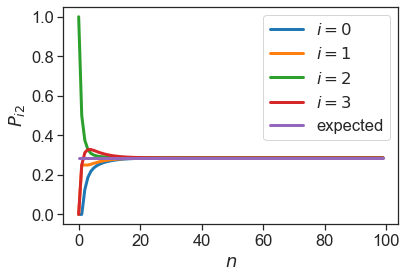

In [5]:
sns.lineplot(x=N, y=i_0, label=r'$i=0$')
sns.lineplot(x=N, y=i_1, label=r'$i=1$')
sns.lineplot(x=N, y=i_2, label=r'$i=2$')
sns.lineplot(x=N, y=i_3, label=r'$i=3$')
sns.lineplot(x=N, y=[1/3.5 for _ in N], label='expected')

plt.xlabel(r'$n$')
plt.ylabel(r'$P_{i2}$')
plt.legend()
plt.show()

The $P^{(n)}_{i2}$'s converge as $n$ goes. The values converge to the limiting probability $\pi_2 = \frac{1}{3.5} \approx 0.29$.

## part (d)

Repeat with $p=0.1$.

In [7]:
p = 0.1
P = P_matrix(p)

In [8]:
N = range(100)
i_0 = [0 for _ in N]
i_1 = [0 for _ in N]
i_2 = [0 for _ in N]
i_3 = [0 for _ in N]

for n in N:
    P_n = np.linalg.matrix_power(P, n)
    i_0[n] = P_n[0,2]
    i_1[n] = P_n[1,2]
    i_2[n] = P_n[2,2]
    i_3[n] = P_n[3,2]

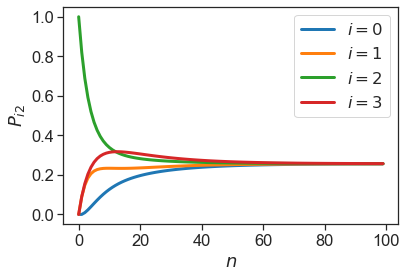

In [9]:
sns.lineplot(x=N, y=i_0, label=r'$i=0$')
sns.lineplot(x=N, y=i_1, label=r'$i=1$')
sns.lineplot(x=N, y=i_2, label=r'$i=2$')
sns.lineplot(x=N, y=i_3, label=r'$i=3$')

plt.xlabel(r'$n$')
plt.ylabel(r'$P_{i2}$')
plt.legend()
plt.show()

All $P_{i2}$ converge in both cases, however, the case in which $p = 1/2$ converges much faster.